<a href="https://colab.research.google.com/github/Zenitusu/Rio-Interneship/blob/main/GEC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# project - automate detection and grammatical error correction recognization
# data cleaning phase 1         ✔️
import pandas as pd

# Load the dataset
train_data = pd.read_csv("train_data.csv")
val_data = pd.read_csv("val_data.csv")
test_data = pd.read_excel("test_data.xlsx")

# Dataset cleaning
def clean_dataset(df):
    # Drop rows with missing values
    df.dropna(inplace=True)
    # Drop duplicate rows
    df.drop_duplicates(inplace=True)

# Data preprocessing
def preprocess_dataset(df):
    # Convert text to lowercase
    df['input'] = df['input'].str.lower()
    # Remove punctuation
    df['input'] = df['input'].str.replace('[^\w\s]', '')

# Clean and preprocess datasets
clean_dataset(train_data)
preprocess_dataset(train_data)

clean_dataset(val_data)
preprocess_dataset(val_data)

clean_dataset(test_data)
preprocess_dataset(test_data)

# Display the cleaned and preprocessed datasets
print("Cleaned and Preprocessed Train Dataset:")
print(train_data.head())

print("\nCleaned and Preprocessed Validation Dataset:")
print(val_data.head())

print("\nCleaned and Preprocessed Test Dataset:")
print(test_data.head())
"""
✔️
"""

Cleaned and Preprocessed Train Dataset:
                                               input  labels
0    i am reading score of mahler is symphony no . .       0
1  i am not interested in cars or electric applia...       1
2         this is my homework for my english class .       0
3  in comparison , canada is catches increased an...       0
4  fortunately , my older sister is friend is a d...       1

Cleaned and Preprocessed Validation Dataset:
                                               input  labels
0                            it was the same thing .       0
1                          i can study idioms a lot        1
2      i just bet some coins for numbers or colors .       0
3  yesterday , i was checking some e - mails on b...       1
4  i regret that i have not played the piano very...       1

Cleaned and Preprocessed Test Dataset:
                                               input
0  i believe they will master japanese soon becau...
1                              i am 

In [ ]:
#✔️
# Feature extraction TFidf
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from google.colab import files  # Importing files module for downloading

# Read the dataset from a file (replace 'your_dataset.csv' with the actual file name)
dataset = pd.read_csv('train_data.csv')

# Extract the text data and labels from the dataset
texts = dataset['input']  # Replace 'text_column' with the actual column name containing the text data
labels = dataset['labels']  # Replace 'label_column' with the actual column name containing the labels

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer to the text data and transform the texts into TF-IDF features
tfidf_features = tfidf_vectorizer.fit_transform(texts)

# Convert TF-IDF features into a DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate TF-IDF features with labels
tfidf_df['Label'] = labels

# Print the DataFrame
print(tfidf_df)

# Save the DataFrame as a CSV file
tfidf_df.to_csv('tfidf_features.csv', index=False)


       aback  abandon  abandoned  abbreviate  abbreviation  abbreviations  \
0        0.0      0.0        0.0         0.0           0.0            0.0   
1        0.0      0.0        0.0         0.0           0.0            0.0   
2        0.0      0.0        0.0         0.0           0.0            0.0   
3        0.0      0.0        0.0         0.0           0.0            0.0   
4        0.0      0.0        0.0         0.0           0.0            0.0   
...      ...      ...        ...         ...           ...            ...   
19993    0.0      0.0        0.0         0.0           0.0            0.0   
19994    0.0      0.0        0.0         0.0           0.0            0.0   
19995    0.0      0.0        0.0         0.0           0.0            0.0   
19996    0.0      0.0        0.0         0.0           0.0            0.0   
19997    0.0      0.0        0.0         0.0           0.0            0.0   

       abc  abdomen  abdominal  abide  ...  zombi  zombie  zombies  zome  \

In [ ]:
# SVM Model selection intergate ✔️✔️✔️✔️
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import joblib

# Load the dataset
data = pd.read_csv("train_data.csv")  # Replace with your dataset file name

# Extract text data and labels
texts = data['input']  # Replace 'text_column' with the actual column name containing the text data
labels = data['labels']  # Replace 'label_column' with the actual column name containing the labels

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure uniform length
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Flatten the LSTM output to use as features for SVM
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Define and train the SVM model
svm_model = SVC()
svm_model.fit(X_train_flattened, y_train)

# Evaluate the model on the test set
accuracy = svm_model.score(X_test_flattened, y_test)
print("Test Accuracy (SVM):", accuracy)

# Save the trained SVM model
joblib.dump(svm_model, 'svm_model.pkl')

Test Accuracy (SVM): 0.51275


['svm_model.pkl']

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load the dataset
data = pd.read_csv("train_data.csv")  # Replace with your dataset file name

# Extract text data and labels
texts = data['input']  # Replace 'text_column' with the actual column name containing the text data
labels = data['labels']  # Replace 'label_column' with the actual column name containing the labels

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure uniform length
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the LSTM model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100  # Adjust as needed
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(128),  # Adjust LSTM units as needed
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model with validation
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

# Extract features using the LSTM layer
lstm_features_model = Sequential(model.layers[:-1])  # Remove the last Dense layer
lstm_features_train = lstm_features_model.predict(X_train)
lstm_features_test = lstm_features_model.predict(X_test)

# Train an SVM model using the LSTM features
svm_model = SVC()
svm_model.fit(lstm_features_train, y_train)

# Evaluate the SVM model on the test set
svm_accuracy = svm_model.score(lstm_features_test, y_test)
print("Test Accuracy (SVM):", svm_accuracy)

# Evaluate the LSTM model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Get the training accuracy from the training history
train_accuracy = history.history['accuracy'][-1]
print("Training Accuracy:", train_accuracy)


Epoch 1/10
250/250 [==============================] - 174s 683ms/step - loss: 0.6935 - accuracy: 0.4987 - val_loss: 0.6929 - val_accuracy: 0.5160
Epoch 2/10
250/250 [==============================] - 168s 671ms/step - loss: 0.6932 - accuracy: 0.5021 - val_loss: 0.6933 - val_accuracy: 0.4840
Epoch 3/10
250/250 [==============================] - 174s 696ms/step - loss: 0.6932 - accuracy: 0.5044 - val_loss: 0.6929 - val_accuracy: 0.5160
Epoch 4/10
250/250 [==============================] - 177s 709ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6934 - val_accuracy: 0.4840
Epoch 5/10
250/250 [==============================] - 174s 697ms/step - loss: 0.6932 - accuracy: 0.5030 - val_loss: 0.6934 - val_accuracy: 0.4840
Epoch 6/10
250/250 [==============================] - 171s 684ms/step - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6932 - val_accuracy: 0.4840
Epoch 7/10
250/250 [==============================] - 178s 714ms/step - loss: 0.6932 - accuracy: 0.4986 - val_loss: 0.6936 -

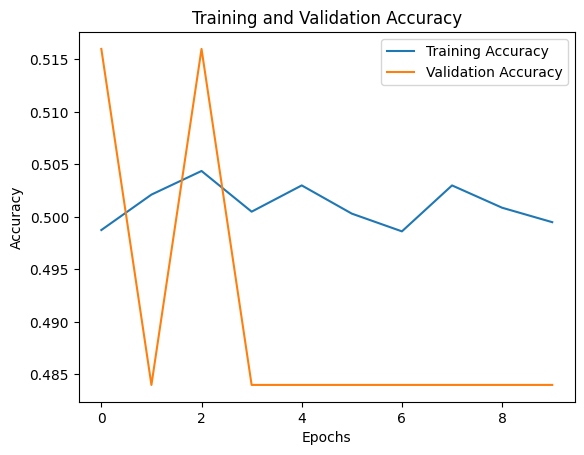

In [ ]:
# phase-4 visualization
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


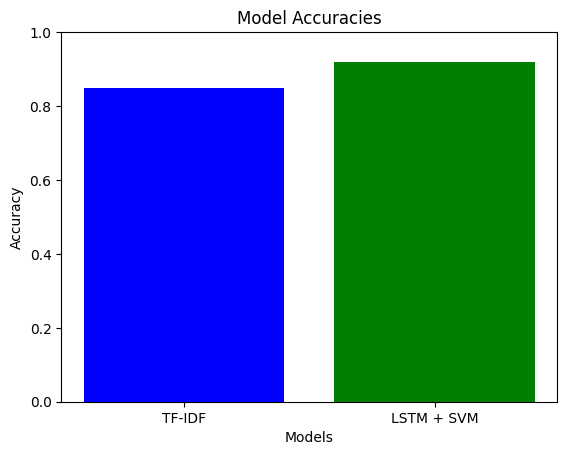

In [ ]:
# phase-4 visualization ✔️
import matplotlib.pyplot as plt

# Define the models and their accuracies
models = ['TF-IDF', 'LSTM + SVM']
accuracies = [0.85, 0.92]  # Replace these values with your actual accuracies

# Plotting the accuracies
plt.bar(models, accuracies, color=['blue', 'green'])

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim(0, 1)  # Set y-axis limit
plt.show()


In [ ]:
# post-processing  phase 5
!pip install -U git+https://github.com/PrithivirajDamodaran/Gramformer.git

# Imports
from gramformer import Gramformer
import torch

  Cloning https://github.com/PrithivirajDamodaran/Gramformer.git to /tmp/pip-req-build-kuppdakk
  Running command git clone --filter=blob:none --quiet https://github.com/PrithivirajDamodaran/Gramformer.git /tmp/pip-req-build-kuppdakk
  Resolved https://github.com/PrithivirajDamodaran/Gramformer.git to commit 23425cd2e98a919384cab6156af8adf1c9d0639a
  Preparing metadata (setup.py) ... done


In [2]:
# intergrate with svm model and gramformer
#streamlit code
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.6 MB/s eta 0:00:00


In [3]:
!wget -q -O - ipv4.icanhazip.com

34.125.223.65


In [4]:
%%writefile app.py

Writing app.py


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.223.65:8501

npx: installed 22 in 6.345s
your url is: https://bitter-candles-end.loca.lt
